## KMeans on Dataset

### Import Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

### Data

In [41]:
y = load_digits()
x = y.data

In [42]:
print(y.data.shape)
print(y.target.shape)

(1797, 64)
(1797,)


### Closest Centroids

In [43]:
def find_closest_centroids(X, centroids):

    idx = np.zeros(X.shape[0], dtype=int)
    distances = np.linalg.norm(X[:, np.newaxis, :]-centroids, axis=-1)
    idx = np.argmin(distances, axis=1)

    return idx

### New Centroids

In [44]:
def compute_centroids(X, idx, centroids, k):
    for i in range(k):
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

### Cost Fxn

In [45]:
def calculate_cost(X, idx, centroids):
    cost = 0
    for i in range(len(centroids)):
        cluster_points = X[idx == i]
        centroid = centroids[i]
        squared_distances = np.sum((cluster_points - centroid) ** 2)
        cost += squared_distances
    return cost

### KMeans

In [46]:
def run_kMeans(X, max_iters, k):
    n, d = X.shape
    centroids = X[np.random.choice(n, k, replace=False)]

    print(f"{'Iteration':<10}{'Cost':<15}")

    prev_cost=np.inf
    cost=0

    for i in range(max_iters):
        if np.abs(prev_cost-cost)<1e-5:
            break
        idx = find_closest_centroids(X, centroids)
        prev_cost=cost
        cost = calculate_cost(X, idx, centroids)

        print(f"{i + 1:<10}{cost:<15}")

        centroids = compute_centroids(X, idx, centroids, k)

    return centroids, idx

### Accuracy

In [47]:
a, b = run_kMeans(x, 500, 10)
print("Accuracy =", 100*np.mean(y.target == b) ,"%")

Iteration Cost           
1         2200821.0      
2         1350015.1326135732
3         1269300.2939177735
4         1222999.1918115378
5         1203430.802113088
6         1196048.8784609928
7         1191343.7017864238
8         1186246.9113908475
9         1178558.1836494096
10        1172331.0528777547
11        1170473.467159647
12        1169728.6326912164
13        1169247.4913509362
14        1169030.1277787515
15        1168657.898558232
16        1168458.6513767831
17        1168352.904516846
18        1168270.7611715095
19        1168213.695864973
20        1168155.0884386091
21        1168138.470703751
22        1168114.6811013191
23        1168047.6186823056
24        1167980.0000008368
25        1167934.3664520192
26        1167913.0814257886
27        1167913.0814257886
Accuracy = 21.869782971619365 %


## Image compression with K-means

### Original Image

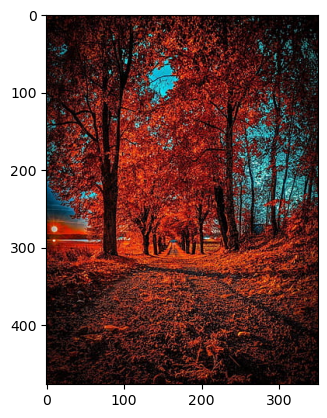

In [48]:
original_img = plt.imread('img.jpg')
plt.imshow(original_img)
plt.show()

In [49]:
# Gives the blue intensity of the pixel at row 50 and column 33.
original_img[50, 33, 2]

3

In [50]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (477, 350, 3)


### KMeans

In [51]:
X_img = np.reshape(
    original_img, (original_img.shape[0] * original_img.shape[1], 3))
print("Shape of X_img is:", X_img.shape)

Shape of X_img is: (166950, 3)


In [52]:
max_iter = 30
k = 15
centroids, idx = run_kMeans(X_img, max_iter, k)

Iteration Cost           
1         43781887.0     
2         49980593.0     
3         41135943.0     
4         38460701.0     
5         44339643.0     
6         41379622.0     
7         42976230.0     
8         44861244.0     
9         38541832.0     
10        47024985.0     
11        48069250.0     
12        45159958.0     
13        48686274.0     
14        47209719.0     
15        46897952.0     
16        54406681.0     
17        41543248.0     
18        46274205.0     
19        46353725.0     
20        44931931.0     
21        42955662.0     
22        42160785.0     
23        47762661.0     
24        46725568.0     
25        49721593.0     
26        45458226.0     
27        45037810.0     
28        44430050.0     
29        41047695.0     
30        50940765.0     


### RGB Values plot with Centroids

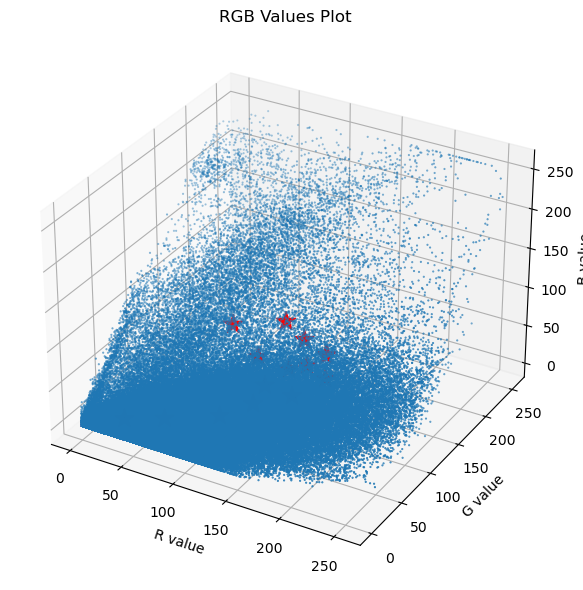

In [53]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_img[:, 0], X_img[:, 1], X_img[:, 2], s=0.3)
ax.set_xlabel('R value')
ax.set_ylabel('G value')
ax.set_zlabel('B value')
ax.set_title('RGB Values Plot')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, alpha=1, marker='*', c='red', zorder=2)
fig.tight_layout()
plt.show()

### Colors of Centroids

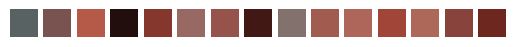

In [54]:
fig, axs = plt.subplots(1, len(centroids))
for i in range(len(centroids)):
    axs[i].imshow(centroids[i].reshape(1, 1, 3))
    axs[i].axis('off')
plt.show()

### Decomposed Image

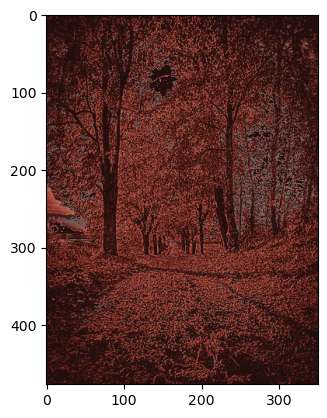

In [55]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)

plt.imshow(X_recovered)

plt.show()